#### Objective 1: To identify fuel-efficient model

Apply pattern mining techniques to determine the best vehicle model with the lowest combined fuel consumption in L/100 km for the years 2020-2022.

In [ ]:
#Importing requied libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Reading the dataset
data=pd.read_csv('Fuel_Consumption_2000-2022.csv')

In [ ]:
data.shape

(22556, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [ ]:
data.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [ ]:
data.tail(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236
22555,2022,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252


In [ ]:
data.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [ ]:
#Brands involved in dataframe
data['MAKE'].unique()

array(['ACURA', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET',
       'CHRYSLER', 'DAEWOO', 'DODGE', 'FERRARI', 'FORD', 'GMC', 'HONDA',
       'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA', 'MERCEDES-BENZ',
       'NISSAN', 'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'SAAB',
       'SATURN', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO',
       'BENTLEY', 'ROLLS-ROYCE', 'MASERATI', 'MINI', 'MITSUBISHI',
       'SMART', 'HUMMER', 'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI',
       'SCION', 'FIAT', 'RAM', 'SRT', 'ALFA ROMEO', 'GENESIS', 'Acura',
       'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'Bugatti',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford',
       'Genesis', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Maserati',
       'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram',
       'Rolls-Royce', 'Sub

In [ ]:
#Body-type of Vehicle
data['VEHICLE CLASS'].unique()

array(['COMPACT', 'MID-SIZE', 'SUBCOMPACT', 'STATION WAGON - MID-SIZE',
       'MINICOMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL', 'FULL-SIZE',
       'SUV', 'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD',
       'PICKUP TRUCK - SMALL', 'MINIVAN', 'SUV - STANDARD',
       'SPECIAL PURPOSE VEHICLE', 'SUV - SMALL', 'Compact', 'SUV: Small',
       'Two-seater', 'Mid-size', 'Minicompact', 'Subcompact',
       'Station wagon: Small', 'Full-size', 'SUV: Standard',
       'Special purpose vehicle', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Station wagon: Mid-size'], dtype=object)

In [ ]:
data.nlargest(5,'FUEL CONSUMPTION')

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
2313,2003,FERRARI,ENZO,TWO-SEATER,6.0,12,AS6,Z,30.6,17.6,24.8,11,570
14511,2015,CHEVROLET,EXPRESS 3500 PASSENGER FFV,VAN - PASSENGER,6.0,8,A6,E,30.6,20.6,26.1,11,418
14716,2015,GMC,SAVANA 3500 PASSENGER FFV,VAN - PASSENGER,6.0,8,A6,E,30.6,20.6,26.1,11,418
14507,2015,CHEVROLET,EXPRESS 2500 PASSENGER FFV,VAN - PASSENGER,6.0,8,A6,E,30.3,20.5,25.9,11,414
14712,2015,GMC,SAVANA 2500 PASSENGER FFV,VAN - PASSENGER,6.0,8,A6,E,30.3,20.5,25.9,11,414


In [ ]:
data.nsmallest(5,'FUEL CONSUMPTION')

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
12084,2012,TOYOTA,PRIUS c,COMPACT,1.5,4,AV,X,3.5,4.0,3.7,76,85
13143,2013,TOYOTA,PRIUS c,COMPACT,1.5,4,AV,X,3.5,4.0,3.7,76,85
14184,2014,TOYOTA,PRIUS c,COMPACT,1.5,4,AV,X,3.6,4.0,3.8,74,87
9912,2010,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,3.7,4.0,3.8,74,87
11009,2011,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,3.7,4.0,3.8,74,87


       YEAR     MAKE       MODEL  FUEL CONSUMPTION  HWY (L/100 km)  \
22062  2022  Hyundai  IONIQ Blue               4.0             3.9   
21117  2021  Hyundai  IONIQ Blue               4.0             3.9   
20157  2020  Hyundai  IONIQ Blue               4.2             4.0   

       COMB (L/100 km)  
22062              4.0  
21117              4.0  
20157              4.1  


<Axes: xlabel='FUEL CONSUMPTION', ylabel='Count'>

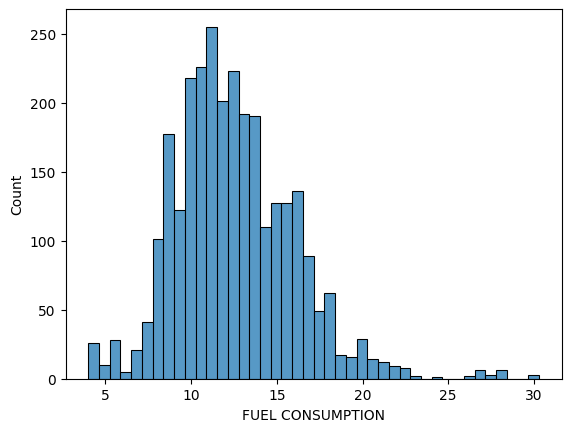

In [ ]:
import pandas as pd
import seaborn as sns

# Assuming you have a DataFrame named 'data' with the required data

# Filter the data for the year range 2020-2022
filtered_data = data[(data['YEAR'] >= 2020) & (data['YEAR'] <= 2022)]

# Select relevant columns
FUEL = filtered_data[['YEAR', 'MAKE', 'MODEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)','COMB (L/100 km)']]

# Sort the data by 'FUEL CONSUMPTION' in ascending order and select the top 3 rows
top_three_lowest_consumption = FUEL.sort_values(by='FUEL CONSUMPTION').head(3)

# Display the top three lowest consumption models
print(top_three_lowest_consumption)

# Create a histogram plot of the data
sns.histplot(FUEL['FUEL CONSUMPTION'])


# **Clustering**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming you have a DataFrame named 'data' with the required data
# Filter the data for the year range 2020-2022
filtered_data = data[(data['YEAR'] >= 2020) & (data['YEAR'] <= 2022)]

# Select relevant columns
FUEL = filtered_data[['YEAR','MAKE','MODEL', 'HWY (L/100 km)','COMB (L/100 km)']]

# Perform K-Means clustering with k=3 (to find the top three clusters)
kmeans = KMeans(n_clusters=3, random_state=0).fit(FUEL[['HWY (L/100 km)','COMB (L/100 km)']])

# Add cluster labels to the data
FUEL['Cluster'] = kmeans.labels_

# Find the cluster with the lowest mean HWY (L/100 km) values
cluster_means = FUEL.groupby('Cluster')['HWY (L/100 km)'].mean()
lowest_cluster = cluster_means.idxmin()

# Filter the data for the cluster with the lowest mean HWY (L/100 km) values
lowest_cluster_data = FUEL[FUEL['Cluster'] == lowest_cluster]

# Sort the data within the lowest cluster to find the top three lowest HWY consumption models
top_three_lowest_hwys = lowest_cluster_data.sort_values(by='HWY (L/100 km)').head(3)

# Display the top three lowest HWY consumption models
print(top_three_lowest_hwys)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       YEAR     MAKE       MODEL  HWY (L/100 km)  COMB (L/100 km)  Cluster
22062  2022  Hyundai  IONIQ Blue             3.9              4.0        2
21117  2021  Hyundai  IONIQ Blue             3.9              4.0        2
20157  2020  Hyundai  IONIQ Blue             4.0              4.1        2


<ipython-input-64-7bb7e9ff1fa7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FUEL['Cluster'] = kmeans.labels_


# **Regression Analysis**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv("Fuel_Consumption_2000-2022.csv")

# Filter the data for the year range 2020-2022
filtered_data = data[(data['YEAR'] >= 2020) & (data['YEAR'] <= 2022)]

# Select relevant columns
FUEL = filtered_data[['YEAR', 'MAKE', 'MODEL', 'HWY (L/100 km)', 'COMB (L/100 km)']]

# Create a dictionary to store the regression results for each model
model_regression_results = {}

# Iterate through unique vehicle models and perform linear regression
unique_models = FUEL['MODEL'].unique()
for model in unique_models:
    model_data = FUEL[FUEL['MODEL'] == model]

    X = model_data[['HWY (L/100 km)']].values
    y = model_data[['COMB (L/100 km)']].values

    model_reg = LinearRegression()
    model_reg.fit(X, y)

    # Store the coefficients for each model
    model_regression_results[model] = model_reg.coef_[0][0]

# Sort models by their regression coefficients (lower coefficients represent lower consumption)
sorted_models = sorted(model_regression_results, key=model_regression_results.get)

# Select the top three models with the lowest coefficients
top_three_lowest_consumption_models = sorted_models[:3]

# Display the top three lowest consumption models
for model in top_three_lowest_consumption_models:
    print(f"Model: {model}, Coefficient: {model_regression_results[model]}")

Model: 230i Coupe, Coefficient: -8.999999999999957
Model: Escape AWD, Coefficient: -7.666666666666686
Model: S 560 Cabriolet, Coefficient: -3.0000000000000173


# **Machine Learning technique**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Load the dataset
data = pd.read_csv("Fuel_Consumption_2000-2022.csv")

# Filter the data for the year range 2020-2022
filtered_data = data[(data['YEAR'] >= 2020) & (data['YEAR'] <= 2022)]

# Select relevant columns
FUEL = filtered_data[['MAKE', 'MODEL', 'YEAR', 'HWY (L/100 km)']]

# Perform one-hot encoding on the 'MODEL' and 'MAKE' columns
model_encoded = pd.get_dummies(FUEL[['MODEL', 'MAKE']], columns=['MODEL', 'MAKE'], prefix=['MODEL', 'MAKE'])

# Combine the encoded features with 'HWY (L/100 km)' and 'YEAR'
X = pd.concat([model_encoded, FUEL[['YEAR', 'HWY (L/100 km)']],], axis=1)
y = FUEL['HWY (L/100 km)']

# Create a decision tree regression model
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the data
regressor.fit(X, y)

# Predict the values for the entire dataset
y_pred = regressor.predict(X)

# Add the predicted values to the DataFrame
FUEL['Predicted'] = y_pred

# Sort the data by predicted values (lowest predictions represent lowest consumption)
top_three_lowest_hwys_models = FUEL.sort_values(by='Predicted').head(3)

# Display the top three lowest HWY consumption models
print(top_three_lowest_hwys_models[['MAKE', 'MODEL', 'YEAR', 'HWY (L/100 km)', 'Predicted']])


          MAKE       MODEL  YEAR  HWY (L/100 km)  Predicted
21117  Hyundai  IONIQ Blue  2021             3.9        3.9
22062  Hyundai  IONIQ Blue  2022             3.9        3.9
20157  Hyundai  IONIQ Blue  2020             4.0        4.0


<ipython-input-54-b1f68b7bf565>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FUEL['Predicted'] = y_pred


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Load the dataset
data = pd.read_csv("Fuel_Consumption_2000-2022.csv")

# Filter the data for the year range 2020-2022
filtered_data = data[(data['YEAR'] >= 2020) & (data['YEAR'] <= 2022)]

# Select relevant columns
FUEL = filtered_data[['MAKE', 'MODEL', 'YEAR', 'HWY (L/100 km)', 'COMB (L/100 km)']]

# Perform one-hot encoding on the 'MODEL' and 'MAKE' columns
model_encoded = pd.get_dummies(FUEL[['MODEL', 'MAKE']], columns=['MODEL', 'MAKE'], prefix=['MODEL', 'MAKE'])

# Combine the encoded features with 'YEAR', 'HWY (L/100 km)', and 'COMB (L/100 km)'
X = pd.concat([model_encoded, FUEL[['YEAR', 'HWY (L/100 km)', 'COMB (L/100 km)']],], axis=1)
y = FUEL[['HWY (L/100 km)', 'COMB (L/100 km)']]

# Create a decision tree regression model
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the data
regressor.fit(X, y)

# Predict the values for the entire dataset
y_pred = regressor.predict(X)

# Add the predicted values to the DataFrame
FUEL['Predicted_HWY'] = y_pred[:, 0]  # Predicted HWY consumption
FUEL['Predicted_COMB'] = y_pred[:, 1]  # Predicted COMB consumption

# Sort the data by predicted values (lowest predictions represent lowest consumption)
top_three_lowest_hwys_models = FUEL.sort_values(by='Predicted_HWY').head(3)
top_three_lowest_comb_models = FUEL.sort_values(by='Predicted_COMB').head(3)

# Display the top three lowest HWY and COMB consumption models
print("Top Three Lowest HWY Consumption Models:")
print(top_three_lowest_hwys_models[['MAKE', 'MODEL', 'YEAR', 'HWY (L/100 km)', 'Predicted_HWY']])

print("\nTop Three Lowest COMB Consumption Models:")
print(top_three_lowest_comb_models[['MAKE', 'MODEL', 'YEAR', 'COMB (L/100 km)', 'Predicted_COMB']])


Top Three Lowest HWY Consumption Models:
          MAKE       MODEL  YEAR  HWY (L/100 km)  Predicted_HWY
21117  Hyundai  IONIQ Blue  2021             3.9            3.9
22062  Hyundai  IONIQ Blue  2022             3.9            3.9
20157  Hyundai  IONIQ Blue  2020             4.0            4.0

Top Three Lowest COMB Consumption Models:
          MAKE       MODEL  YEAR  COMB (L/100 km)  Predicted_COMB
21117  Hyundai  IONIQ Blue  2021              4.0             4.0
22062  Hyundai  IONIQ Blue  2022              4.0             4.0
20157  Hyundai  IONIQ Blue  2020              4.1             4.1


<ipython-input-86-adcb4b481b3f>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FUEL['Predicted_HWY'] = y_pred[:, 0]  # Predicted HWY consumption
<ipython-input-86-adcb4b481b3f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FUEL['Predicted_COMB'] = y_pred[:, 1]  # Predicted COMB consumption


# **Mean Absolute Error**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv("Fuel_Consumption_2000-2022.csv")

# Filter the data for the year range 2020-2022
filtered_data = data[(data['YEAR'] >= 2020) & (data['YEAR'] <= 2022)]

# Select relevant columns
FUEL = filtered_data[['YEAR','MAKE','MODEL', 'HWY (L/100 km)']]

# Group the data by 'MODEL' and calculate the mean HWY (L/100 km) for each model
model_mean_hwy = FUEL.groupby('MODEL')['HWY (L/100 km)'].mean().reset_index()

# Sort the models by mean HWY (L/100 km) in ascending order
model_mean_hwy = model_mean_hwy.sort_values(by='HWY (L/100 km)')

# Select the top three models with the lowest mean HWY consumption
top_three_lowest_hwys = model_mean_hwy.head(3)

# Display the top three lowest HWY consumption models
print(top_three_lowest_hwys)

# Calculate the MAE for each model and the actual data
mae_values = []
for model in top_three_lowest_hwys['MODEL']:
    model_data = filtered_data[filtered_data['MODEL'] == model]
    y_true = model_data['HWY (L/100 km)']
    y_pred = [model_mean_hwy[model_mean_hwy['MODEL'] == model]['HWY (L/100 km)'].values[0]] * len(y_true)
    mae = mean_absolute_error(y_true, y_pred)
    mae_values.append(mae)

# Add MAE values to the DataFrame
top_three_lowest_hwys['MAE'] = mae_values

# Display the top three models with the lowest MAE
print(top_three_lowest_hwys)

                   MODEL  HWY (L/100 km)
544           IONIQ Blue        3.933333
543                IONIQ        4.133333
377  Elantra Hybrid Blue        4.200000
                   MODEL  HWY (L/100 km)       MAE
544           IONIQ Blue        3.933333  0.044444
543                IONIQ        4.133333  0.044444
377  Elantra Hybrid Blue        4.200000  0.000000


<ipython-input-41-19ffc7320a92>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_three_lowest_hwys['MAE'] = mae_values


**with adding COMB (L/100)**

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv("Fuel_Consumption_2000-2022.csv")

# Filter the data for the year range 2020-2022
filtered_data = data[(data['YEAR'] >= 2020) & (data['YEAR'] <= 2022)]

# Select relevant columns
FUEL = filtered_data[['YEAR', 'MAKE', 'MODEL', 'HWY (L/100 km)', 'COMB (L/100 km)']]

# Group the data by 'MODEL' and calculate the mean HWY (L/100 km) and COMB (L/100 km) for each model
model_mean_hwy_comb = FUEL.groupby('MODEL')[['HWY (L/100 km)', 'COMB (L/100 km)']].mean().reset_index()

# Calculate the mean of HWY and COMB consumption to find combined mean
model_mean_hwy_comb['Combined (L/100 km)'] = (model_mean_hwy_comb['HWY (L/100 km)'] + model_mean_hwy_comb['COMB (L/100 km)']) / 2

# Sort the models by combined mean consumption in ascending order
model_mean_hwy_comb = model_mean_hwy_comb.sort_values(by='Combined (L/100 km)')

# Select the top three models with the lowest combined mean consumption
top_three_lowest_combined = model_mean_hwy_comb.head(3)

# Display the top three lowest combined consumption models
print("Top Three Lowest Combined Consumption Models:")
print(top_three_lowest_combined)

# Calculate the MAE for each model and the actual data
mae_values = []
for model in top_three_lowest_combined['MODEL']:
    model_data = filtered_data[filtered_data['MODEL'] == model]
    y_true_hwy = model_data['HWY (L/100 km)']
    y_true_comb = model_data['COMB (L/100 km)']
    y_pred_hwy = [model_mean_hwy_comb[model_mean_hwy_comb['MODEL'] == model]['HWY (L/100 km)'].values[0]] * len(y_true_hwy)
    y_pred_comb = [model_mean_hwy_comb[model_mean_hwy_comb['MODEL'] == model]['COMB (L/100 km)'].values[0]] * len(y_true_comb)

    mae_hwy = mean_absolute_error(y_true_hwy, y_pred_hwy)
    mae_comb = mean_absolute_error(y_true_comb, y_pred_comb)
    combined_mae = (mae_hwy + mae_comb) / 2
    mae_values.append(combined_mae)

# Add MAE values to the DataFrame
top_three_lowest_combined['MAE'] = mae_values

# Display the top three models with the lowest MAE for combined consumption
print("\nTop Three Lowest Combined Consumption Models with MAE:")
print(top_three_lowest_combined[['MODEL', 'Combined (L/100 km)', 'MAE']])


Top Three Lowest Combined Consumption Models:
                   MODEL  HWY (L/100 km)  COMB (L/100 km)  Combined (L/100 km)
544           IONIQ Blue        3.933333         4.033333             3.983333
543                IONIQ        4.133333         4.200000             4.166667
377  Elantra Hybrid Blue        4.200000         4.400000             4.300000

Top Three Lowest Combined Consumption Models with MAE:
                   MODEL  Combined (L/100 km)       MAE
544           IONIQ Blue             3.983333  0.044444
543                IONIQ             4.166667  0.022222
377  Elantra Hybrid Blue             4.300000  0.000000


<ipython-input-89-77ea774b0aac>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_three_lowest_combined['MAE'] = mae_values


# **Root Mean Square Error**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv("Fuel_Consumption_2000-2022.csv")

# Filter the data for the year range 2020-2022
filtered_data = data[(data['YEAR'] >= 2020) & (data['YEAR'] <= 2022)]

# Select relevant columns
FUEL = filtered_data[['MODEL', 'HWY (L/100 km)']]

# Group the data by 'MODEL' and calculate the mean HWY (L/100 km) for each model
model_mean_hwy = FUEL.groupby('MODEL')['HWY (L/100 km)'].mean().reset_index()

# Sort the models by mean HWY (L/100 km) in ascending order
model_mean_hwy = model_mean_hwy.sort_values(by='HWY (L/100 km)')

# Select the top three models with the lowest mean HWY consumption
top_three_lowest_hwys = model_mean_hwy.head(3)

# Display the top three lowest HWY consumption models
print(top_three_lowest_hwys)

# Calculate the RMSE for each model and the actual data
rmse_values = []
for model in top_three_lowest_hwys['MODEL']:
    model_data = filtered_data[filtered_data['MODEL'] == model]
    y_true = model_data['HWY (L/100 km)']
    y_pred = [model_mean_hwy[model_mean_hwy['MODEL'] == model]['HWY (L/100 km)'].values[0]] * len(y_true)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    rmse_values.append(rmse)

# Add RMSE values to the DataFrame
top_three_lowest_hwys['RMSE'] = rmse_values

# Display the top three models with the lowest RMSE
print(top_three_lowest_hwys)

                   MODEL  HWY (L/100 km)
544           IONIQ Blue        3.933333
543                IONIQ        4.133333
377  Elantra Hybrid Blue        4.200000
                   MODEL  HWY (L/100 km)     RMSE
544           IONIQ Blue        3.933333  0.04714
543                IONIQ        4.133333  0.04714
377  Elantra Hybrid Blue        4.200000  0.00000


<ipython-input-42-ec8f16b857b1>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_three_lowest_hwys['RMSE'] = rmse_values


**With adding COMB (L/100)**

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv("Fuel_Consumption_2000-2022.csv")

# Filter the data for the year range 2020-2022
filtered_data = data[(data['YEAR'] >= 2020) & (data['YEAR'] <= 2022)]

# Select relevant columns
FUEL = filtered_data[['MODEL', 'HWY (L/100 km)', 'COMB (L/100 km)']]

# Group the data by 'MODEL' and calculate the mean HWY (L/100 km) and COMB (L/100 km) for each model
model_mean_hwy_comb = FUEL.groupby('MODEL')[['HWY (L/100 km)', 'COMB (L/100 km)']].mean().reset_index()

# Calculate the mean of HWY and COMB consumption to find combined mean
model_mean_hwy_comb['Combined (L/100 km)'] = (model_mean_hwy_comb['HWY (L/100 km)'] + model_mean_hwy_comb['COMB (L/100 km)']) / 2

# Sort the models by combined mean consumption in ascending order
model_mean_hwy_comb = model_mean_hwy_comb.sort_values(by='Combined (L/100 km)')

# Select the top three models with the lowest combined mean consumption
top_three_lowest_combined = model_mean_hwy_comb.head(3)

# Display the top three lowest combined consumption models
print("Top Three Lowest Combined Consumption Models:")
print(top_three_lowest_combined)

# Calculate the RMSE for each model and the actual data
rmse_values = []
for model in top_three_lowest_combined['MODEL']:
    model_data = filtered_data[filtered_data['MODEL'] == model]
    y_true_hwy = model_data['HWY (L/100 km)']
    y_true_comb = model_data['COMB (L/100 km)']
    y_pred_hwy = [model_mean_hwy_comb[model_mean_hwy_comb['MODEL'] == model]['HWY (L/100 km)'].values[0]] * len(y_true_hwy)
    y_pred_comb = [model_mean_hwy_comb[model_mean_hwy_comb['MODEL'] == model]['COMB (L/100 km)'].values[0]] * len(y_true_comb)

    rmse_hwy = np.sqrt(mean_squared_error(y_true_hwy, y_pred_hwy))
    rmse_comb = np.sqrt(mean_squared_error(y_true_comb, y_pred_comb))
    combined_rmse = np.sqrt((rmse_hwy ** 2 + rmse_comb ** 2) / 2)
    rmse_values.append(combined_rmse)

# Add RMSE values to the DataFrame
top_three_lowest_combined['RMSE'] = rmse_values

# Display the top three models with the lowest RMSE for combined consumption
print("\nTop Three Lowest Combined Consumption Models with RMSE:")
print(top_three_lowest_combined[['MODEL', 'Combined (L/100 km)', 'RMSE']])


Top Three Lowest Combined Consumption Models:
                   MODEL  HWY (L/100 km)  COMB (L/100 km)  Combined (L/100 km)
544           IONIQ Blue        3.933333         4.033333             3.983333
543                IONIQ        4.133333         4.200000             4.166667
377  Elantra Hybrid Blue        4.200000         4.400000             4.300000

Top Three Lowest Combined Consumption Models with RMSE:
                   MODEL  Combined (L/100 km)      RMSE
544           IONIQ Blue             3.983333  0.047140
543                IONIQ             4.166667  0.033333
377  Elantra Hybrid Blue             4.300000  0.000000


<ipython-input-90-6fbd931b3679>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_three_lowest_combined['RMSE'] = rmse_values


# **R-squared**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv("Fuel_Consumption_2000-2022.csv")

# Filter the data for the year range 2020-2022
filtered_data = data[(data['YEAR'] >= 2020) & (data['YEAR'] <= 2022)]

# Select relevant columns
FUEL = filtered_data[['MODEL', 'HWY (L/100 km)']]

# Group the data by 'MODEL' and calculate the mean HWY (L/100 km) for each model
model_mean_hwy = FUEL.groupby('MODEL')['HWY (L/100 km)'].mean().reset_index()

# Sort the models by mean HWY (L/100 km) in ascending order
model_mean_hwy = model_mean_hwy.sort_values(by='HWY (L/100 km)')

# Select the top three models with the lowest mean HWY consumption
top_three_lowest_hwys = model_mean_hwy.head(3)

# Display the top three lowest HWY consumption models
print(top_three_lowest_hwys)

# Calculate the R² score for each model
r2_values = []
for model in top_three_lowest_hwys['MODEL']:
    model_data = filtered_data[filtered_data['MODEL'] == model]
    X = model_data[['HWY (L/100 km)']].values
    y = model_data['HWY (L/100 km)'].values
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    r2 = r2_score(y, y_pred)
    r2_values.append(r2)

# Add R² values to the DataFrame
top_three_lowest_hwys['R²'] = r2_values

# Display the top three models with the lowest R²
print(top_three_lowest_hwys)

                   MODEL  HWY (L/100 km)
544           IONIQ Blue        3.933333
543                IONIQ        4.133333
377  Elantra Hybrid Blue        4.200000
                   MODEL  HWY (L/100 km)   R²
544           IONIQ Blue        3.933333  1.0
543                IONIQ        4.133333  1.0
377  Elantra Hybrid Blue        4.200000  1.0


<ipython-input-43-72e2b8e3e52c>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_three_lowest_hwys['R²'] = r2_values


**With adding COMB (L/100)**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv("Fuel_Consumption_2000-2022.csv")

# Filter the data for the year range 2020-2022
filtered_data = data[(data['YEAR'] >= 2020) & (data['YEAR'] <= 2022)]

# Select relevant columns
FUEL = filtered_data[['MODEL', 'HWY (L/100 km)', 'COMB (L/100 km)']]

# Group the data by 'MODEL' and calculate the mean HWY (L/100 km) and COMB (L/100 km) for each model
model_mean_hwys_comb = FUEL.groupby('MODEL')[['HWY (L/100 km)', 'COMB (L/100 km)']].mean().reset_index()

# Sort the models by mean COMB consumption in ascending order
model_mean_hwys_comb = model_mean_hwys_comb.sort_values(by='COMB (L/100 km)')

# Select the top three models with the lowest mean COMB consumption
top_three_lowest_comb = model_mean_hwys_comb.head(3)

# Display the top three lowest COMB consumption models
print("Top Three Lowest COMB Consumption Models:")
print(top_three_lowest_comb)

# Calculate the R² score for each model
r2_values = []
for model in top_three_lowest_comb['MODEL']:
    model_data = filtered_data[filtered_data['MODEL'] == model]
    X = model_data[['COMB (L/100 km)']]
    y = model_data['COMB (L/100 km)']
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    r2 = r2_score(y, y_pred)
    r2_values.append(r2)

# Add R² values to the DataFrame
top_three_lowest_comb['R²'] = r2_values

# Display the top three models with the lowest R²
print("Top Three Lowest COMB Consumption Models with R²:")
print(top_three_lowest_comb[['MODEL', 'COMB (L/100 km)', 'R²']])


Top Three Lowest COMB Consumption Models:
                   MODEL  HWY (L/100 km)  COMB (L/100 km)
544           IONIQ Blue        3.933333         4.033333
543                IONIQ        4.133333         4.200000
377  Elantra Hybrid Blue        4.200000         4.400000
Top Three Lowest COMB Consumption Models with R²:
                   MODEL  COMB (L/100 km)   R²
544           IONIQ Blue         4.033333  1.0
543                IONIQ         4.200000  1.0
377  Elantra Hybrid Blue         4.400000  1.0


<ipython-input-95-9dff7a5d647c>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_three_lowest_comb['R²'] = r2_values


#### Objective 2 : To analyze the best transmission type

##### Utilize pattern mining techniques to identify the transmission type of the best fuel-efficient model, providing insights into the transmission preferences of eco-conscious consumers.

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('Fuel_Consumption_2000-2022.csv')

In [3]:
# Identify the Best Fuel-Efficient Model
best_model = data.loc[data['COMB (mpg)'].idxmax()]['MAKE']

In [4]:
# Filter Data for the Best Model
filtered_data_best_model = data[data['MAKE'] == best_model]

In [5]:
# Select Relevant Columns for Frequent Itemsets
selected_columns_frequent = ['TRANSMISSION', 'MAKE']

In [6]:
# Filter the data to include only the selected columns
filtered_data_frequent = filtered_data_best_model[selected_columns_frequent]

In [7]:
# Perform one-hot encoding for the selected columns
data_encoded_frequent = pd.get_dummies(filtered_data_frequent)

In [8]:
# Apriori algorithm for frequent itemset mining with a minimum support
min_support_threshold = 0.05  # Adjust this threshold as needed
frequent_itemsets = apriori(data_encoded_frequent, min_support=min_support_threshold, use_colnames=True)

In [9]:
# Display frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
     support                        itemsets
0   0.079012               (TRANSMISSION_A4)
1   0.320988               (TRANSMISSION_A5)
2   0.125926               (TRANSMISSION_AV)
3   0.054321              (TRANSMISSION_AV7)
4   0.197531               (TRANSMISSION_M5)
5   0.140741               (TRANSMISSION_M6)
6   1.000000                    (MAKE_HONDA)
7   0.079012   (TRANSMISSION_A4, MAKE_HONDA)
8   0.320988   (TRANSMISSION_A5, MAKE_HONDA)
9   0.125926   (TRANSMISSION_AV, MAKE_HONDA)
10  0.054321  (TRANSMISSION_AV7, MAKE_HONDA)
11  0.197531   (MAKE_HONDA, TRANSMISSION_M5)
12  0.140741   (TRANSMISSION_M6, MAKE_HONDA)


In [10]:
# Generate association rules
association_rules_result = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

In [11]:
# Display association rules
print("Association Rules:")
print(association_rules_result)

Association Rules:
          antecedents   consequents  antecedent support  consequent support   
0   (TRANSMISSION_A4)  (MAKE_HONDA)            0.079012                 1.0  \
1   (TRANSMISSION_A5)  (MAKE_HONDA)            0.320988                 1.0   
2   (TRANSMISSION_AV)  (MAKE_HONDA)            0.125926                 1.0   
3  (TRANSMISSION_AV7)  (MAKE_HONDA)            0.054321                 1.0   
4   (TRANSMISSION_M5)  (MAKE_HONDA)            0.197531                 1.0   
5   (TRANSMISSION_M6)  (MAKE_HONDA)            0.140741                 1.0   

    support  confidence  lift  leverage  conviction  zhangs_metric  
0  0.079012         1.0   1.0       0.0         inf            0.0  
1  0.320988         1.0   1.0       0.0         inf            0.0  
2  0.125926         1.0   1.0       0.0         inf            0.0  
3  0.054321         1.0   1.0       0.0         inf            0.0  
4  0.197531         1.0   1.0       0.0         inf            0.0  
5  0.140741  

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Sort the rules by support in descending order
association_rules_result = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

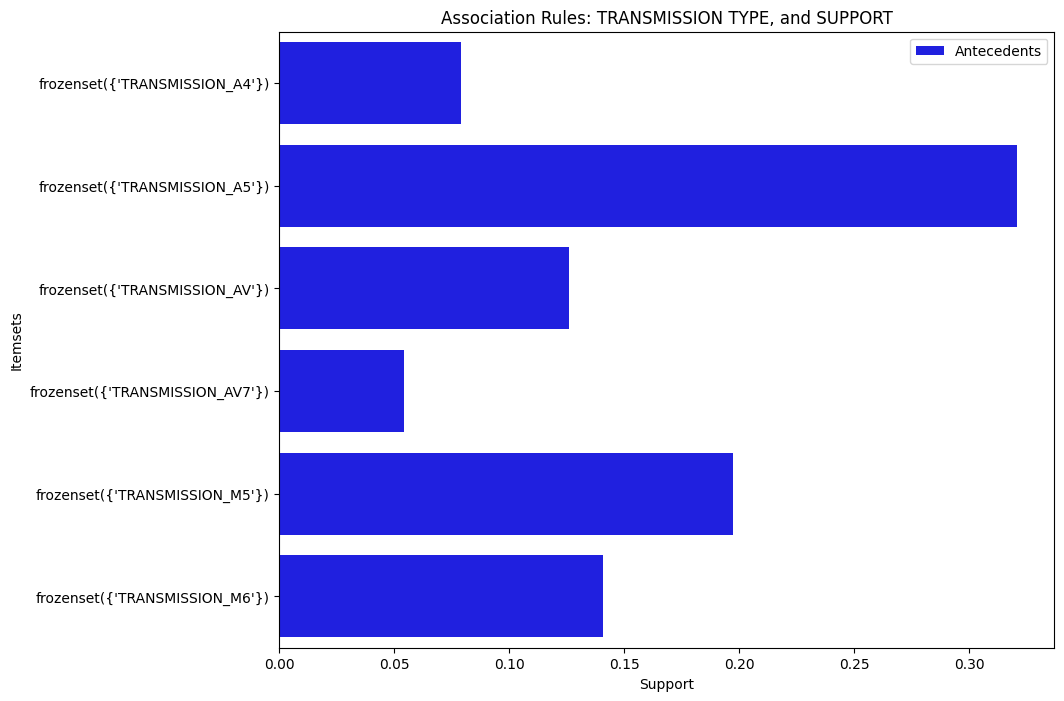

In [19]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot horizontal bar plot for antecedents, consequents, and support
sns.barplot(x='support', y='antecedents', data=association_rules_result, color='blue', label='Antecedents')

# Add labels and title
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Association Rules: TRANSMISSION TYPE, and SUPPORT')

# Add legend
plt.legend()

# Show the plot
plt.show()

#### Conclusion

##### The analysis of frequent itemsets reveals that among the transmission types for the best fuel-efficient model, automatic transmission A5 stands out as the most prevalent choice, representing 32.1% of instances. Manual transmissions M5 and M6 also show considerable adoption, with supports of 19.8% and 14.1%, respectively. Automatic transmission with variable ratios (AV) and automatic transmission A4 contribute to the transmission options, each with supports of 12.6% and 7.9%. Automatic transmission AV7, while less common, still plays a role with a support of 5.4%.